e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\3RD YEAR\6th Sem\PE 3 & 4\NLP\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


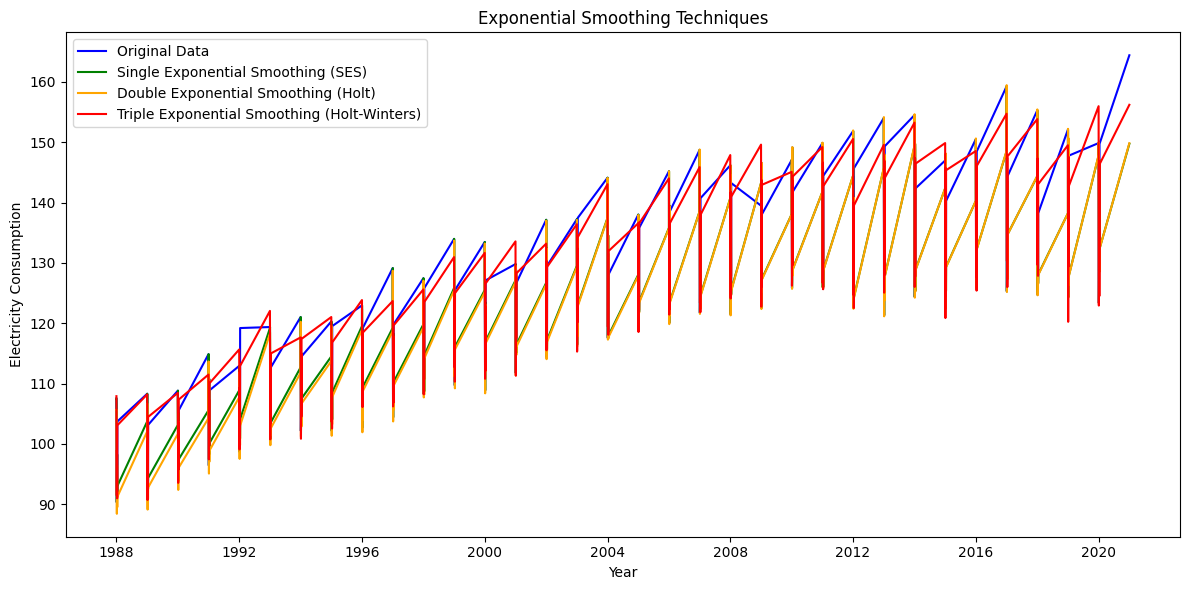

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import (
    SimpleExpSmoothing,
    Holt,
    ExponentialSmoothing
)

# ---------------------------------
# 1. Load CSV file
# ---------------------------------
file_name = input().strip()
df = pd.read_csv("ML471_S1_Datafile_Concept.csv")

# ---------------------------------
# 2. Parse DATE column
# ---------------------------------
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['DATE'])
df.set_index('DATE', inplace=True)

# ---------------------------------
# 3. Extract consumption series
# ---------------------------------
series = df['Consumption']

# ---------------------------------
# 4. Single Exponential Smoothing (SES)
# ---------------------------------
ses_model = SimpleExpSmoothing(series).fit()
ses_fitted = ses_model.fittedvalues

# ---------------------------------
# 5. Double Exponential Smoothing (Holt)
# ---------------------------------
holt_model = Holt(series).fit()
holt_fitted = holt_model.fittedvalues

# ---------------------------------
# 6. Triple Exponential Smoothing (Holt-Winters)
# ---------------------------------
hw_model = ExponentialSmoothing(
    series,
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

hw_fitted = hw_model.fittedvalues

# ---------------------------------
# 7. Visualization
# ---------------------------------
plt.figure(figsize=(12, 6))

plt.plot(series, label='Original Data', color='blue')
plt.plot(ses_fitted, label='Single Exponential Smoothing (SES)', color='green')
plt.plot(holt_fitted, label='Double Exponential Smoothing (Holt)', color='orange')
plt.plot(hw_fitted, label='Triple Exponential Smoothing (Holt-Winters)', color='red')

plt.title("Exponential Smoothing Techniques")
plt.xlabel("Year")
plt.ylabel("Electricity Consumption")
plt.legend()
plt.tight_layout()
plt.show()
